In [1]:
from scipy.io import loadmat
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import trapz
def cm2inch(value):
    return value/2.54

#axes.xaxis.set_tick_params(direction='in', which='both')
#axes.yaxis.set_tick_params(direction='in', which='both')



mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 1
mpl.rcParams["figure.dpi"] = 130
from matplotlib import rc
#rc('font', family='serif')
rc('text', usetex=True)
rc('xtick', labelsize='medium')
rc('ytick', labelsize='medium')
def cm2inch(value):
    return value/2.54
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
def pdf(data, bins = 10, density = True):
    
    pdf, bins_edge = np.histogram(data, bins = bins, density = density)
    bins_center = (bins_edge[0:-1] + bins_edge[1:]) / 2
    
    return pdf, bins_center

def format_dataset(dataset):
    for i in dataset.keys():
        try:
            dataset[i] = np.squeeze(dataset[i])
        except:
            continue
    return dataset
    

In [2]:
dataset_15 = loadmat("15kpa/data_graphs.mat")
dataset_15 = format_dataset(dataset_15)
dataset_28_1 = loadmat("28kPa/12-2910/data_graphs.mat")
dataset_28_1 = format_dataset(dataset_28_1)
dataset_28_2 = loadmat("28kPa/14-2910/data_graphs.mat")
dataset_28_2 = format_dataset(dataset_28_2)
dataset_28_3 = loadmat("28kPa/13-2910/data_graphs.mat")
dataset_28_3 = format_dataset(dataset_28_3)

In [3]:
a = 1.5e-6
def F_corr(alpha,z):
    return -alpha * D(z) * 4e-21 * D_1_prime(z)

def D_1_prime(z):
    return (2 * r * (2 * r**2 + 12 * r * z + 21 *  z**2))/(2 * r** + 9 * r * z + 6 * z**2)**2

def D(z):
    return (6*z**2 + 9*r*z + 2*r**2) / (6*z**2 + 2 * r * z)

def F_corr(alpha,z):
    return -alpha * D(z) * 4e-21 * D_1_prime(z)
def F_corr(alpha,z):
    return - 4e-21 * alpha *(42*a*z*z + 24*a*a*z + 4*a*a*a)/(36*(z**4) + 66*a*(z**3) + 30*a*a*z*z + 4*(a**3)*z)


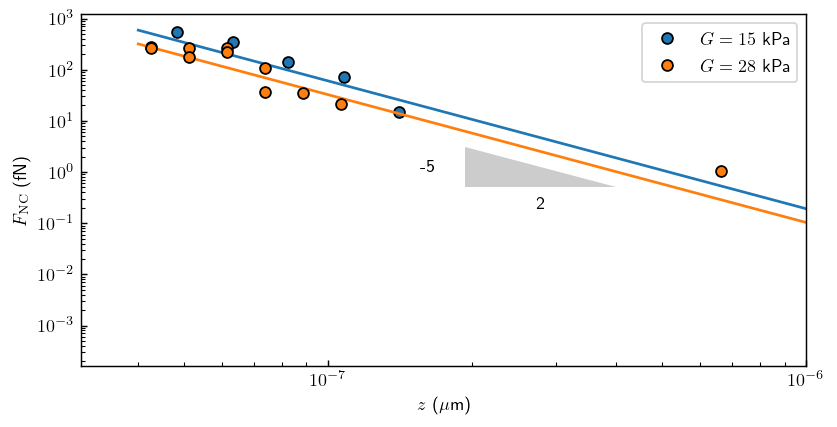

In [59]:
fig = plt.figure(figsize=((cm2inch(16),cm2inch(8))))
plt.plot(dataset_15["z_F_EHD_exp"][dataset_15["z_F_EHD_exp"]>4e-8],dataset_15["F_EHD_exp"][dataset_15["z_F_EHD_exp"]>4e-8]*1e15 + 1*1e15*F_corr(1,dataset_15["z_F_EHD_exp"][dataset_15["z_F_EHD_exp"]>4e-8]), "o", label="$G = 15$ kPa")
plt.plot(dataset_15["z_F_EHD_th"][dataset_15["z_F_EHD_th"] > 4e-8],dataset_15["F_EHD_th"][dataset_15["z_F_EHD_th"] > 4e-8]*1e15 , color="tab:blue")

plt.plot(dataset_28_1["z_F_EHD_exp"][dataset_28_1["z_F_EHD_exp"] > 4e-8],dataset_28_1["F_EHD_exp"][dataset_28_1["z_F_EHD_exp"] > 4e-8]*1e15 + 1*1e15*F_corr(1,dataset_28_1["z_F_EHD_exp"][dataset_28_1["z_F_EHD_exp"] > 4e-8]) , "o", label="$G= 28$ kPa")
ax=plt.gca()
ax.loglog(dataset_28_1["z_F_EHD_th"][dataset_28_1["z_F_EHD_th"] > 4e-8],dataset_28_1["F_EHD_th"][dataset_28_1["z_F_EHD_th"] > 4e-8]*1e15, color="tab:orange")

plt.plot(dataset_28_2["z_F_EHD_exp"][dataset_28_2["z_F_EHD_exp"] > 4e-8],dataset_28_2["F_EHD_exp"][dataset_28_2["z_F_EHD_exp"] > 4e-8]*1e15  +1* 1e15*F_corr(1,dataset_28_2["z_F_EHD_exp"][dataset_28_2["z_F_EHD_exp"] > 4e-8]), "o",color="tab:orange")

from mpltools import annotation

annotation.slope_marker((4e-7, 0.5), (-5, 2), ax=ax, invert=True, size_frac=0.12, text_kwargs={"usetex":True})
plt.legend()
plt.ylabel("$F_\mathrm{NC} $ (fN)")
plt.xlabel("$z$ ($\mathrm{\mu}$m)")
plt.ylim([None,None])
plt.xlim([None,1e-6])
plt.tight_layout(pad=0.2)
plt.savefig("EHD_force.pdf")

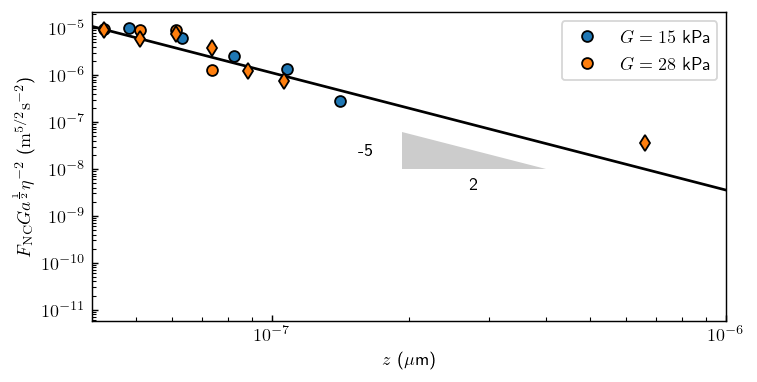

In [61]:
fig = plt.figure(figsize=((cm2inch(16),cm2inch(8))))
plt.plot(dataset_15["z_F_EHD_exp"][dataset_15["z_F_EHD_exp"]>4e-8],(dataset_15["F_EHD_exp"][dataset_15["z_F_EHD_exp"]>4e-8] + F_corr(1,dataset_15["z_F_EHD_exp"][dataset_15["z_F_EHD_exp"]>4e-8]))*15e3*np.sqrt(1.5e-6)/(0.001**2), "o", label="$G=15$ kPa")
plt.gca()
plt.plot(dataset_28_1["z_F_EHD_exp"][dataset_28_1["z_F_EHD_exp"] > 4e-8],(dataset_28_1["F_EHD_exp"][dataset_28_1["z_F_EHD_exp"] > 4e-8] + F_corr(1,dataset_28_1["z_F_EHD_exp"][dataset_28_1["z_F_EHD_exp"] > 4e-8])) *28e3*np.sqrt(1.5e-6)/(0.001**2), "o", label="$G=28$ kPa")
plt.loglog(dataset_28_1["z_F_EHD_th"][dataset_28_1["z_F_EHD_th"] > 4e-8],(dataset_28_1["F_EHD_th"][dataset_28_1["z_F_EHD_th"] > 4e-8] )*28e3*np.sqrt(1.5e-6)/(0.001**2), color="black")

plt.plot(dataset_28_2["z_F_EHD_exp"][dataset_28_2["z_F_EHD_exp"] > 4e-8],(dataset_28_2["F_EHD_exp"][dataset_28_2["z_F_EHD_exp"] > 4e-8]  +F_corr(1,dataset_28_2["z_F_EHD_exp"][dataset_28_2["z_F_EHD_exp"] > 4e-8]))*28e3*np.sqrt(1.5e-6)/(0.001**2), "d",color="tab:orange")

annotation.slope_marker((4e-7, 1e-8), (-5, 2), ax=plt.gca(), invert=True, size_frac=0.12)


plt.legend()
plt.ylabel("$F_\mathrm{NC} Ga^{\\frac{1}{2}} \eta ^{-2}$ ($\mathrm{ m^{5/2} s ^{-2}}$)")
plt.xlabel("$z$ ($\mathrm{\mu}$m)")
#plt.ylim([1e8,2e10])
plt.xlim([4e-8,1e-6])
plt.savefig("EHD_force_rescale.pdf")

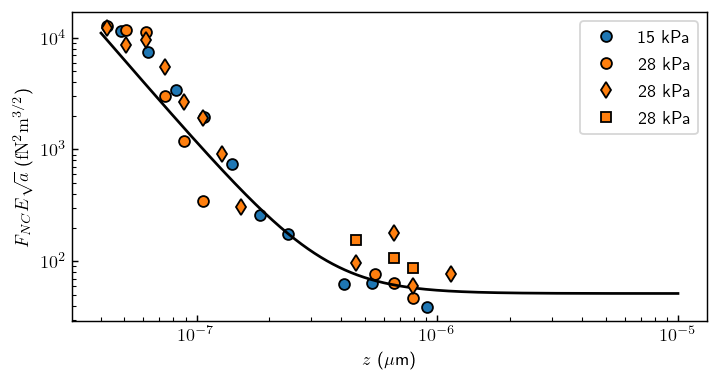

In [6]:
fig = plt.figure(figsize=((cm2inch(16),cm2inch(8))))

plt.plot(dataset_15["z_F_EHD_exp"][dataset_15["z_F_EHD_exp"]>4e-8],dataset_15["F_EHD_exp"][dataset_15["z_F_EHD_exp"]>4e-8]*1e15*15e3*np.sqrt(1.5e-6), "o", label="15 kPa")
#plt.plot(dataset_15["z_F_EHD_th"][dataset_15["z_F_EHD_th"] > 4e-8],dataset_15["F_EHD_th"][dataset_15["z_F_EHD_th"] > 4e-8]*1e15 + 1.5, color="tab:blue")

plt.plot(dataset_28_1["z_F_EHD_exp"][dataset_28_1["z_F_EHD_exp"] > 4e-8],dataset_28_1["F_EHD_exp"][dataset_28_1["z_F_EHD_exp"] > 4e-8]*1e15*28e3*np.sqrt(1.5e-6), "o", label="28 kPa")
plt.loglog(dataset_28_1["z_F_EHD_th"][dataset_28_1["z_F_EHD_th"] > 4e-8],dataset_28_1["F_EHD_th"][dataset_28_1["z_F_EHD_th"] > 4e-8]*1e15*28e3*np.sqrt(1.5e-6) + 1.5*28e3*np.sqrt(1.5e-6), color="black")

plt.plot(dataset_28_2["z_F_EHD_exp"][dataset_28_2["z_F_EHD_exp"] > 4e-8],dataset_28_2["F_EHD_exp"][dataset_28_2["z_F_EHD_exp"] > 4e-8]*1e15*28e3*np.sqrt(1.5e-6), "d", label="28 kPa",color="tab:orange")

plt.plot(dataset_28_3["z_F_EHD_exp"][dataset_28_3["z_F_EHD_exp"] > 4e-8],dataset_28_3["F_EHD_exp"][dataset_28_3["z_F_EHD_exp"] > 4e-8]*1e15*28e3*np.sqrt(1.5e-6), "s", label="28 kPa",color="tab:orange")


plt.legend()
plt.ylabel("$F_{NC} E\sqrt{a} $ ($\mathrm{fN^2 m^{3/2}}$)")
plt.xlabel("$z$ ($\mathrm{\mu}$m)")

#plt.ylim([-20,100])
#lt.xlim([1e-2,10])v

plt.savefig("EHD_force_rescale.pdf")